# TGOV1 and Its Variants

The four compared cases are exactly the same, except the used ``TurbineGov``.

Note that in cases ``TGOV1DB`` and ``TGOV1NDB``, the parameters ``dbL`` and ``dbU`` are zero by default, which means that the deadband is not in effect.

***NOTE***: A fix was made to ``TGOV1NDB`` by [PR 584](https://github.com/CURENT/andes/pull/584). Before the fix, model ``TGOV1NDB`` was not working properly.

In [1]:
import matplotlib.pyplot as plt

import andes

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(stream_level=40)

In [4]:
sv1n = andes.load('./ieee39_TGOV1N.xlsx',
                  setup=False,
                  no_output=True,
                  default_config=True)

sv1ndb = andes.load('./ieee39_TGOV1NDB.xlsx',
                    setup=False,
                    no_output=True,
                    default_config=True)

sv1 = andes.load('./ieee39_TGOV1.xlsx',
                 setup=False,
                 no_output=True,
                 default_config=True)

sv1db = andes.load('./ieee39_TGOV1DB.xlsx',
                   setup=False,
                   no_output=True,
                   default_config=True)

In [5]:
for ss in [sv1, sv1db, sv1n, sv1ndb]:
    ss.add(model='Alter', param_dict=dict(t=1, model='PQ', dev='PQ_1', src='Ppf',
                                          attr='v', method='+', amount=0.1))
    ss.setup()
    ss.Toggle.set(src='u', attr='v', value=0, idx="Toggler_1")

    ss.PQ.config.p2p = 1
    ss.PQ.config.q2q = 1
    ss.PQ.config.p2z = 0
    ss.PQ.config.q2z = 0

    ss.PFlow.run()
    # turn off under-voltage PQ-to-Z conversion
    ss.PQ.pq2z = 0

    ss.TDS.config.tf = 50
    ss.TDS.config.criteria = 0
    ss.TDS.config.no_tqdm = True
    ss.TDS.run()

<Alter Alter_2>: set PQ.PQ_1.Ppf.v=6.1 at t=1. Previous value was 6.
<Alter Alter_2>: set PQ.PQ_1.Ppf.v=6.1 at t=1. Previous value was 6.
<Alter Alter_2>: set PQ.PQ_1.Ppf.v=6.1 at t=1. Previous value was 6.
<Alter Alter_2>: set PQ.PQ_1.Ppf.v=6.1 at t=1. Previous value was 6.


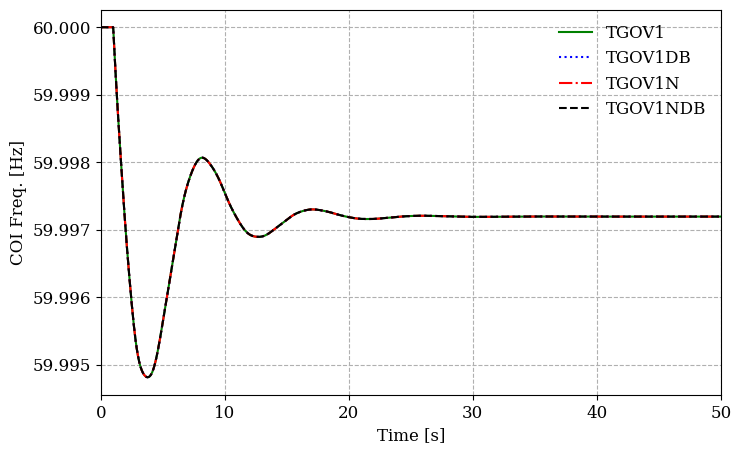

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

for ss, label, linestyle, color in zip([sv1, sv1db, sv1n, sv1ndb],
                                       ['TGOV1', 'TGOV1DB', 'TGOV1N', 'TGOV1NDB'],
                                       [['-'], [':'], ['-.'], ['--']],
                                       ['green', 'blue', 'red', 'black']):
    ss.TDS.plt.plot(ss.COI.omega,
                    yheader=[label],
                    linestyles=linestyle,
                    color=color,
                    line_width=1.5,
                    latex=False,
                    show=False,
                    ytimes=ss.config.freq,
                    grid=True,
                    ylabel='COI Freq. [Hz]',
                    ax=ax, fig=fig)